# TITANIC SURVIVAL PREDICTION

In [4]:
import pandas as pd

df= pd.read_csv('Titanic-Dataset.csv').fillna(0)
dataframe = pd.DataFrame(df)
print(dataframe)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [5]:
dataframe = dataframe.drop('PassengerId',axis=1)
dataframe = dataframe.drop('SibSp',axis=1)
dataframe = dataframe.drop('Parch',axis=1)
dataframe = dataframe.drop('Cabin',axis=1)
dataframe = dataframe.drop('Ticket',axis=1)
dataframe.head(10)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S
5,0,3,"Moran, Mr. James",male,0.0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C


In [6]:
from sklearn.preprocessing import LabelBinarizer

one_hot = LabelBinarizer()

dataframe['Sex'] = one_hot.fit_transform(dataframe['Sex'])

embarked_mapper = {'S':1, 'C':2, 'Q':3}
dataframe['Embarked'] = dataframe['Embarked'].replace(embarked_mapper)

dataframe

,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,1
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,13.0000,1
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,30.0000,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.0,23.4500,1
889,1,1,"Behr, Mr. Karl Howell",1,26.0,30.0000,2


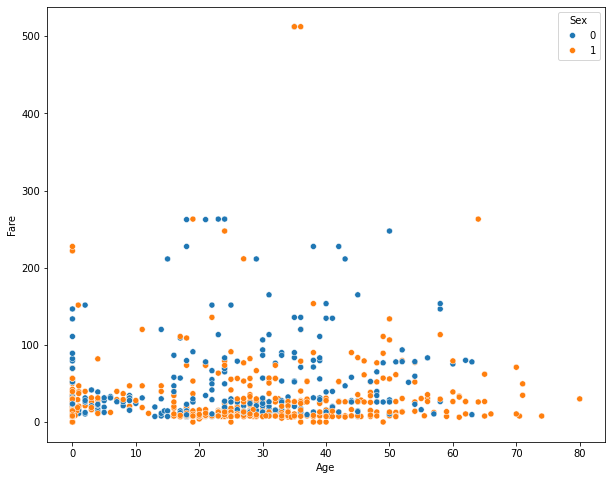

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=dataframe)
plt.show()

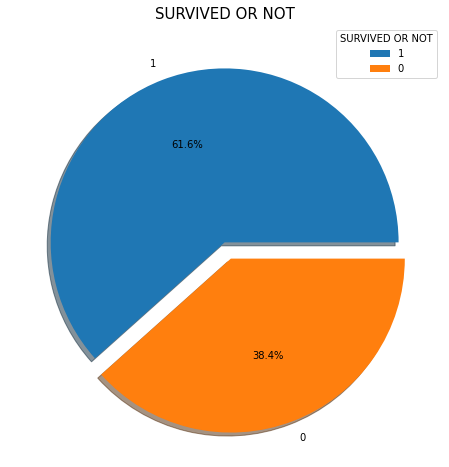

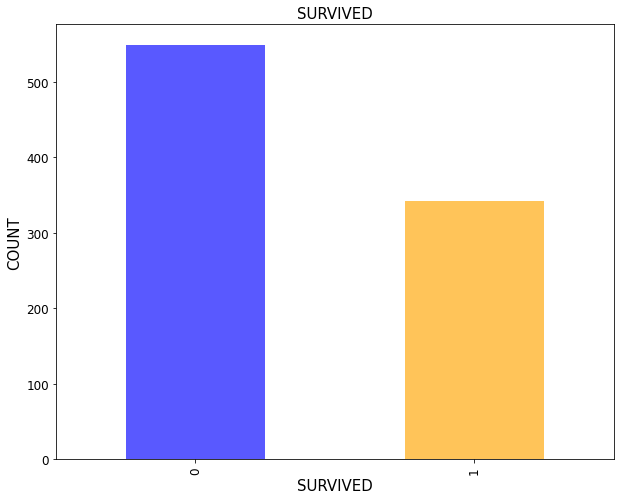

In [30]:
# pie chart

s=[1,0]
explode = (0.0, 0.1)
plt.figure(figsize=(10, 8))
plt.pie(x=dataframe['Survived'].value_counts(), explode=explode, autopct='%1.1f%%', labels=s, shadow=True)
plt.title('SURVIVED OR NOT', fontsize=15)
plt.legend(s, title='SURVIVED OR NOT')
plt.plot()


# bar chart

plt.figure(figsize=(10, 8))
colors = ['blue','orange']
df['Survived'].value_counts().plot(kind='bar', grid = False, color=colors, fontsize=12, alpha=0.65)
plt.title('SURVIVED', fontsize=15)
plt.xlabel('SURVIVED', fontsize=15)
plt.ylabel('COUNT', fontsize=15)
plt.xticks()
plt.show()

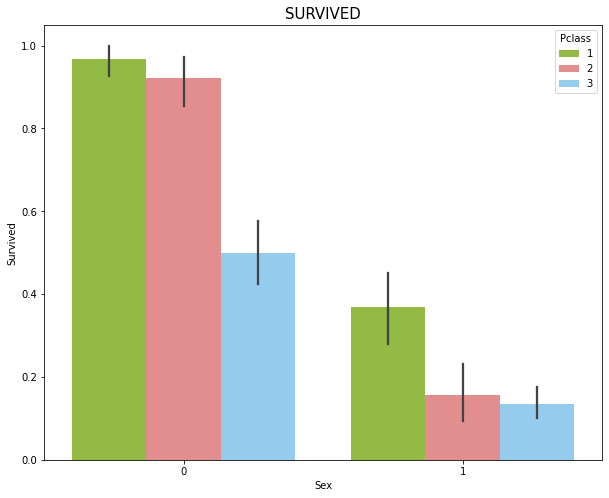

In [53]:
# bar chart

colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(10,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", palette=colors, data=dataframe)
plt.title('SURVIVED', fontsize=15)
plt.xticks()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

x = dataframe.iloc[:,[1,3]].values
y = dataframe.iloc[:,0].values

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=0)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix, cohen_kappa_score

def classify_report(ytest,y_pred):
    cm = confusion_matrix(ytest,y_pred)
    cr = classification_report(ytest,y_pred)
    accuracyscore = accuracy_score(ytest,y_pred)
    errorrate = 1-accuracyscore
    cohenkappascore = cohen_kappa_score(ytest,y_pred)
    
    print ("\nClassification Report:\n")
    print("Confusion Matrix: ", cm)
    print("\nAccuracy: ", accuracyscore)
    print("\nError Rate: ",errorrate )
    print("\nKappa Score: ", cohenkappascore)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

logisticclassifier = LogisticRegression()
logisticclassifier.fit(xtrain,ytrain)

y_pred_lr = logisticclassifier.predict(xtest)

r2score = r2_score(ytest,y_pred_lr)
mae = mean_absolute_error(y_true=ytest, y_pred=y_pred_lr)
mse = mean_squared_error(y_true=ytest, y_pred=y_pred_lr)
rmse = mean_squared_error(y_true=ytest, y_pred=y_pred_lr, squared=False)

print('R2SCORE: ', r2score)
print('\nMAE: ', mae)
print('\nMSE: ', mse)
print('\nRMSE: ', rmse)

print('\n\n')
classify_report(ytest, y_pred_lr)

R2SCORE:  0.09071428571428564

MAE:  0.2126865671641791

MSE:  0.2126865671641791

RMSE:  0.4611795389695635




Classification Report:

Confusion Matrix:  [[140  28]
 [ 29  71]]

Accuracy:  0.7873134328358209

Error Rate:  0.2126865671641791

Kappa Score:  0.5444351664082071


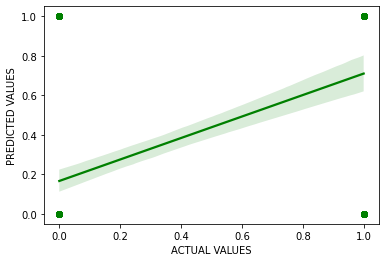

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.regplot(x=ytest,y=y_pred_lr, color='green')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.show(fig)

In [13]:
Passenger_Class = input('Passenger_Class: ')
Gender = input('Gender: ')

predict = {
    'Passenger_Class':[Passenger_Class],
    'Gender':[Gender]
}

predict_data = pd.DataFrame(predict)

from sklearn.linear_model import LogisticRegression

logisticclassifier = LogisticRegression()
logisticclassifier.fit(xtrain,ytrain)
y_pred_lr = logisticclassifier.predict(predict_data)

print('SURVIVED OR NOT: ', y_pred_lr[0])

Passenger_Class: 1
Gender: 0
SURVIVED OR NOT:  1


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
